<a href="https://colab.research.google.com/github/lmencisoe/ADL/blob/main/Laboratorio%203/Laboratorio3_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller3
# Vihlai Maldonado, Miguel Enciso

## Problema
La comunidad científica es de la comunidad más activa que existe a la hora de realizar publicaciones en grandes revistas. Los avances tecnológicos, las facilidades a la hora de encontrar información y la gran cantidad de médicos dedicados a realizar estudios y publicarlos ha aumentado a tal punto que realizar una categorización de estos textos sería ideal para poder filtrar la información y acceder a ella de una manera más rápida y precisa.

Para eso, le han disponibilizado los Abstracts de diferentes artículos de los cuales los expoertos los han clasificado en diferentes categorias, y la idea es poder automatizar este proceso para que futuros artículos puedan ser clasificados automáticamente sin necesidad de disponer del tiempo de los expertos.

Para resolver el modelo, es importante que construyan la mejor Red Neuronal Recurrente que puedan encontrar. El procesamiento, la tokenización, la limpieza de los textos, la definición de los Embedding y la arquitectura de la Red Neuronal, así como la utilización de Redes Preentrenadas están a su criterio. Lo importante es documentar todos los pasos anteriormente descritos.

Datos: https://raw.githubusercontent.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Taller%202/train.dat



In [1]:
!pip install contractions
import nltk
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 15.0 MB/s 
     |████████████████████████████████| 287 kB 31.8 MB/s 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [2]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.layers import TextVectorization

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
plt.style.use("seaborn-deep")
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

#Analisis profundo de datos
from pandas_profiling import ProfileReport
from sklearn.feature_extraction import DictVectorizer

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from sklearn.metrics import accuracy_score

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from keras.utils import np_utils
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Perfilamiento y entendimiento de los datos


Lectura de los datos

In [3]:
url = "https://raw.githubusercontent.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Taller%202/train.dat"
data = pd.read_csv(url, sep="\t",header=None)
data.head()

,0,1
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...


### Exploración de datos

In [4]:
def plot_count_plot_percentages(data_df, column):
  ax = sns.countplot(data=data_df, x=column, color="teal")
  ax.set(title = 'Distribución de la variable ')
  total = float(len(data_df[column]))
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

A continuación revisamos la distribución de las etiquetas en el conjunto de datos:

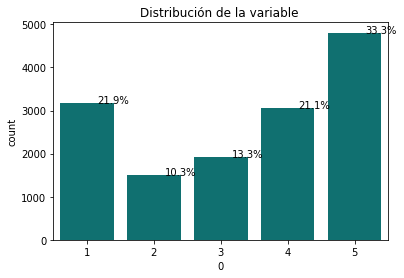

In [5]:
plot_count_plot_percentages(data, 0)

De la gráfica anterior observamos que el mayor porcentaje está en la clase 5 con 33.3%, y la clase de menor porcentaje es la 2 con 10.3%

In [6]:
#Datos duplicados
data[data.duplicated(keep=False)]

,0,1


Del resultado anterior observamos que no tenemos registros duplicados en el conjunto de datos.

In [7]:
#Datos duplicados
null_data_df = data[data.isnull().any(axis=1)]
null_data_df

,0,1


Del resultado anterior observamos que no tenemos registros faltantes en el conujunto de datos.

A continuación se realizan las gráficas de las palabras para cada clase

In [8]:
data_2 = data.copy()
data_2

,0,1
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...
...,...,...
14433,4,Quadricuspid aortic valve and aortic regurgita...
14434,1,Mammographic measurements before and after aug...
14435,1,Use of leukocyte-depleted platelet concentrate...
14436,2,Complications of Tenckhoff catheters post remo...


Renombramos las columnas

In [9]:
data_2['label'] = data_2[0]
data_2['text0'] = data_2[1]
data_2 = data_2[['label', 'text0']]
data_2

,label,text0
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...
...,...,...
14433,4,Quadricuspid aortic valve and aortic regurgita...
14434,1,Mammographic measurements before and after aug...
14435,1,Use of leukocyte-depleted platelet concentrate...
14436,2,Complications of Tenckhoff catheters post remo...


Separamos la data por cada categoría.

In [10]:
data_et1 = data_2[data_2['label']==1]
data_et2 = data_2[data_2['label']==2]
data_et3 = data_2[data_2['label']==3]
data_et4 = data_2[data_2['label']==4]
data_et5 = data_2[data_2['label']==5]

Muestreamos para tener data balanceada

In [11]:
data_et1_s = data_et1.sample(n = len(data_et2), random_state = 2022)
data_et3_s = data_et3.sample(n = len(data_et2), random_state = 2022)
data_et4_s = data_et4.sample(n = len(data_et2), random_state = 2022)
data_et5_s = data_et5.sample(n = len(data_et2), random_state = 2022)

In [12]:
#data_et1_s = data_et1
#data_et3_s = data_et3
#data_et4_s = data_et4
#data_et5_s = data_et5

In [13]:
data_model = pd.concat([data_et1_s, data_et2, data_et3_s, data_et4_s, data_et5_s])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The distribution of ham and spam messages')

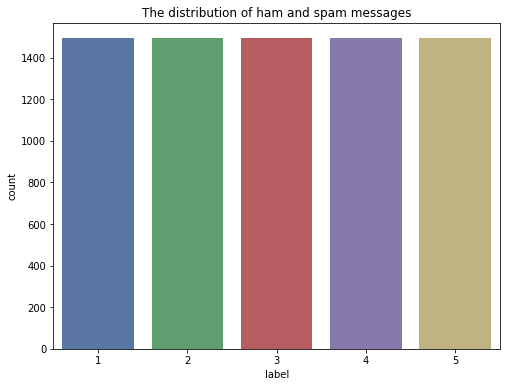

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data_model.label)
plt.title('The distribution of ham and spam messages')

In [15]:
data_model['text_length'] = data_model['text0'].apply(len)
data_model_label = data_model['label'].values

In [16]:
class_names = ['1','2','3','4','5']

In [17]:
def print_plot(index):
    example = data_2[data_2.index == index][['text0', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_plot(3)

Subclavian artery to innominate vein fistula after insertion of a hemodialysis catheter. Insertion of hemodialysis catheters for temporary use is now preferentially performed by percutaneous infraclavicular subclavian vein catheterization. This method involves passage of a stiff dilator and a peel-away sheath over a guide wire, and is usually carried out without fluoroscopy. For the most part this has proved to be a valuable and safe approach. However, a small incidence of major complications occurs, which needs to be emphasized. Sixteen cases of arteriovenous fistulas between the subclavian artery or its branches and the subclavian vein have been reported so far in the literature. To date only one case of subclavian artery to innominate vein fistula has been reported. We report the second case with this complication and suggest possible preventive measures. 
label: 5


Se aprecia que es necesario limpiar el texto

In [18]:
data_3 = data_model.copy()

In [19]:
data_3 = data_3.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') # Reemplazar por espacio caracteres especiales
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') #Eliminar simbolos
STOPWORDS = set(stopwords.words('english')) # Eliminar stopwords del lenguaje: inglés

def clean_text(text):
    text = text.lower() # conversión a minúscula
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # Reemplaza espacios
    text = BAD_SYMBOLS_RE.sub('', text) # Eliminar simbolos
    text = text.replace('x', '') #Reemplazar las X
#   text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data_3['text0'] = data_3['text0'].apply(clean_text) #Limpia los textos
data_3['text0'] = data_3['text0'].str.replace('\d+', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


In [20]:
MAX_NB_WORDS = 20000 #Maximo numero de palabras a usar
MAX_SEQUENCE_LENGTH = 125 #Maximo tamaño de secuencia por artículo
EMBEDDING_DIM = 64 #Tamaño de salida del primer embedding de la red
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) #Tokenizador
tokenizer.fit_on_texts(data_3['text0'].values)
word_index = tokenizer.word_index
print('se encontraron %s tokens únicos.' % len(word_index))

se encontraron 32718 tokens únicos.


In [21]:
X = tokenizer.texts_to_sequences(data_3['text0'].values) #Se crea la secuencia total.
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)  #Se crea la secuencia vectorizada 

In [22]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X = X.astype(float)

Se transforma la variable de salida

In [23]:
Y = pd.get_dummies(data_3['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (7470, 5)


Train y test.

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2022)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5976, 125) (5976, 5)
(1494, 125) (1494, 5)


# **Entrenamiento de modelos**

Modelo BASE con Embedding y sin red recurrente.

In [62]:
# Define parameter
vocab_size = 125
embedding_dim = 64
drop_value = 0.2
n_dense = 12
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = X.shape[1]))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(32, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(16, activation='relu'))
model.add(Dense(5,activation='softmax',name='Capa_Respuesta'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 125, 64)           8000      
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [64]:
num_epochs = 15
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train,
                    Y_train,
                    epochs=num_epochs, 
                    validation_data=(X_test, Y_test),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/15
187/187 - 1s - loss: 1.5726 - accuracy: 0.2940 - val_loss: 1.4360 - val_accuracy: 0.3916 - 1s/epoch - 8ms/step
Epoch 2/15
187/187 - 1s - loss: 1.3685 - accuracy: 0.4142 - val_loss: 1.3438 - val_accuracy: 0.4297 - 766ms/epoch - 4ms/step
Epoch 3/15
187/187 - 1s - loss: 1.3125 - accuracy: 0.4369 - val_loss: 1.3088 - val_accuracy: 0.4618 - 742ms/epoch - 4ms/step
Epoch 4/15
187/187 - 1s - loss: 1.2964 - accuracy: 0.4523 - val_loss: 1.2957 - val_accuracy: 0.4652 - 770ms/epoch - 4ms/step
Epoch 5/15
187/187 - 1s - loss: 1.2766 - accuracy: 0.4662 - val_loss: 1.2928 - val_accuracy: 0.4471 - 694ms/epoch - 4ms/step
Epoch 6/15
187/187 - 1s - loss: 1.2789 - accuracy: 0.4687 - val_loss: 1.2956 - val_accuracy: 0.4552 - 736ms/epoch - 4ms/step
Epoch 7/15
187/187 - 1s - loss: 1.2622 - accuracy: 0.4801 - val_loss: 1.2907 - val_accuracy: 0.4612 - 712ms/epoch - 4ms/step
Epoch 8/15
187/187 - 1s - loss: 1.2610 - accuracy: 0.4707 - val_loss: 1.2827 - val_accuracy: 0.4853 - 722ms/epoch - 4ms/step
Epo

Classification report para data de train

In [65]:
pred_train = model.predict(X_train)
y_pred = list()
for i in range(len(pred_train)):
    y_pred.append((pred_train[i] == pred_train[i].max()).astype(int))
y_pred = np.array(y_pred)
print(classification_report(Y_train,y_pred,target_names=list(class_names)))    

187/187 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           1       0.65      0.77      0.70      1211
           2       0.46      0.52      0.49      1203
           3       0.40      0.56      0.47      1181
           4       0.63      0.76      0.69      1181
           5       0.31      0.02      0.04      1200

   micro avg       0.53      0.53      0.53      5976
   macro avg       0.49      0.53      0.48      5976
weighted avg       0.49      0.53      0.48      5976
 samples avg       0.53      0.53      0.53      5976



Classification report para data de test.

In [66]:
pred_test = model.predict(X_test)
y_pred_test = list()
for i in range(len(pred_test)):
    y_pred_test.append((pred_test[i] == pred_test[i].max()).astype(int))
y_pred_test = np.array(y_pred_test)
print(classification_report(Y_test,y_pred_test,target_names=list(class_names)))    

47/47 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           1       0.60      0.72      0.65       283
           2       0.44      0.48      0.46       291
           3       0.41      0.58      0.48       313
           4       0.58      0.72      0.64       313
           5       0.50      0.02      0.05       294

   micro avg       0.51      0.51      0.51      1494
   macro avg       0.51      0.50      0.46      1494
weighted avg       0.51      0.51      0.46      1494
 samples avg       0.51      0.51      0.51      1494



Accuracy para ambas datas (no hay sobreajuste)

In [67]:
accuracy_score(Y_train, y_pred), accuracy_score(Y_test, y_pred_test)

(0.5251004016064257, 0.5060240963855421)

# Arquitectura de una LSTM con primera capa = embedding realizado anteriormente.

In [68]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 125, 64)           1280000   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 125, 64)          0         
 lDropout1D)                                                     
                                                                 
 lstm_19 (LSTM)              (None, 125, 64)           33024     
                                                                 
 lstm_20 (LSTM)              (None, 125, 32)           12416     
                                                                 
 lstm_21 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                      

Entrenamiento de la red

In [70]:
epochs = 10
batch_size = 64
with tf.device('/device:GPU:0'): 
    history = model.fit(X_train, 
                        Y_train, 
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        validation_data = (X_test, Y_test),
                        callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.0001)])

Epoch 1/10
94/94 [==============================] - 162s 1s/step - loss: 1.4953 - accuracy: 0.3233 - val_loss: 1.2539 - val_accuracy: 0.4592
Epoch 2/10
94/94 [==============================] - 95s 1s/step - loss: 1.0612 - accuracy: 0.6034 - val_loss: 1.1048 - val_accuracy: 0.5910
Epoch 3/10
94/94 [==============================] - 98s 1s/step - loss: 0.8029 - accuracy: 0.7246 - val_loss: 1.1713 - val_accuracy: 0.5589
Epoch 4/10
94/94 [==============================] - 93s 992ms/step - loss: 0.7251 - accuracy: 0.7656 - val_loss: 1.2344 - val_accuracy: 0.5676
Epoch 5/10
94/94 [==============================] - 96s 1s/step - loss: 0.6222 - accuracy: 0.8007 - val_loss: 1.3124 - val_accuracy: 0.5435


Acc de la data de test.

In [71]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

47/47 [==============================] - 3s 66ms/step - loss: 1.3124 - accuracy: 0.5435
Test set
  Loss: 1.312
  Accuracy: 0.544


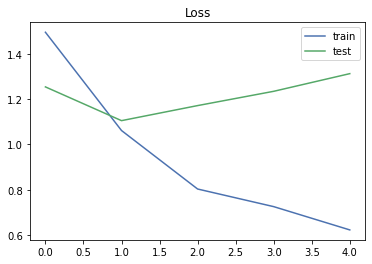

In [72]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

Se aprecia un sobreajuste en el modelo, a pesar de usar el dropout del LSTM

In [73]:
pred_train = model.predict(X_train)
y_pred = list()
for i in range(len(pred_train)):
    y_pred.append((pred_train[i] == pred_train[i].max()).astype(int))

187/187 [==============================] - 13s 65ms/step


Classification report para la data de train con resultados satisfacotrios:

In [74]:
y_pred = np.array(y_pred)
print(classification_report(Y_train,y_pred,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.86      0.94      0.90      1211
           2       0.83      0.93      0.88      1203
           3       0.87      0.90      0.88      1181
           4       0.87      0.93      0.90      1181
           5       0.86      0.59      0.70      1200

   micro avg       0.86      0.86      0.86      5976
   macro avg       0.86      0.86      0.85      5976
weighted avg       0.86      0.86      0.85      5976
 samples avg       0.86      0.86      0.86      5976



In [75]:
pred_test = model.predict(X_test)
y_pred_test = list()
for i in range(len(pred_test)):
    y_pred_test.append((pred_test[i] == pred_test[i].max()).astype(int))

47/47 [==============================] - 4s 80ms/step


Classification report para la data de test, con la evidencia de sobreajuste aunque logrando predecir las categorías: 1,2 y 4 satisfactoriamente.

In [76]:
y_pred_test = np.array(y_pred_test)
print(classification_report(Y_test,y_pred_test,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.59      0.67      0.63       283
           2       0.70      0.63      0.66       291
           3       0.56      0.51      0.53       313
           4       0.61      0.66      0.63       313
           5       0.25      0.24      0.25       294

   micro avg       0.54      0.54      0.54      1494
   macro avg       0.54      0.54      0.54      1494
weighted avg       0.54      0.54      0.54      1494
 samples avg       0.54      0.54      0.54      1494



Accuracy para el LSTM (Claro sobreajuste)

In [77]:
accuracy_score(Y_train, y_pred), accuracy_score(Y_test, y_pred_test)

(0.858433734939759, 0.5435073627844712)

El LSTM a comparación del modelo base presenta sobreajuste, aunque la predicción sobre la data de test es más precisa. \\
En pasos posteriores se recomienda hacer una búsqueda de hiperparámetros, que por capacidad de computación no se logró en el presente ejercicio. \\

Se destaca también la poca capacidad del modelo de predecir la clase 5, por lo qe se recomienda hacer un análisis a profundidad de estos artículos.